# Stage 1 analysis; Long wavelength Spectroscopy

In [25]:
import sys, os, time                                                            
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from importlib import reload                                                    
import eureka.S1_detector_processing.s1_process as s1                                 
from eureka.lib import readECF as rd                                            
from eureka.lib import logedit                                                  
from eureka.lib import readECF as rd                                            
from eureka.lib import manageevent as me                                        
#from eureka.S1_data_reduction import optspex                                    
from eureka.lib import astropytable                                             
from eureka.lib import util   

plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 2

In [2]:
# Starts timer to monitor how long data reduction takes
t0      = time.time()

# Names the event (has to match the event name used for the *.ecf files)
eventlabel = 'wasp39b'                                                           

In [3]:
!ls 'dc-roof'

jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_SKIPJUMP.fits
jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS.fits


In [4]:
hdul = fits.open("dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS.fits")
hdul.info()

Filename: dc-roof/jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp_STOPAFTERBIAS.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     209   ()      
  1  SCI           1 ImageHDU        50   (512, 32, 3, 10)   float32   
  2  PIXELDQ       1 ImageHDU        11   (512, 32)   int32 (rescales to uint32)   
  3  GROUPDQ       1 ImageHDU        11   (512, 32, 3, 10)   uint8   
  4  ERR           1 ImageHDU        11   (512, 32, 3, 10)   float32   
  5  ASDF          1 BinTableHDU     11   1R x 1C   [6414B]   


In [5]:
hdul[1].data

array([[[[ 4.80777588e+01,  7.61723633e+01,  7.25468750e+01, ...,
           6.44921875e+01,  6.65727539e+01,  1.22924805e+01],
         [ 9.70588379e+01,  5.52854004e+01,  7.47080078e+01, ...,
           4.26142578e+01,  4.30212402e+01,  8.54492188e-02],
         [ 1.02121826e+02,  1.10812256e+02,  1.18520508e+01, ...,
           9.89152832e+01,  2.12121582e+01,  4.37231445e+00],
         ...,
         [ 6.59252930e+01,  1.04605469e+02,  9.32697754e+01, ...,
           5.57208252e+01,  3.89252930e+01,  2.68052979e+01],
         [ 9.85385742e+01,  6.63381348e+01,  1.32535034e+02, ...,
           8.52294922e-01,  6.94245605e+01, -8.81164551e-01],
         [ 4.89370117e+01, -3.92187500e+00,  2.80454102e+01, ...,
           1.01806641e+01,  7.26525879e+01, -1.01147461e+01]],

        [[ 2.20777588e+01,  6.41723633e+01,  6.25468750e+01, ...,
           1.09492188e+02,  8.35727539e+01,  4.32924805e+01],
         [ 7.20588379e+01,  5.32854004e+01,  6.17080078e+01, ...,
           7.06142578e

In [6]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-03-21T19:37:31.874' / UTC date file created                     
ORIGIN  = 'STScI   '           / Organization responsible for creating file     
FILENAME= 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_10INTS_ramp.fits' / Na
FILETYPE= 'countrate'          / Type of data in the file                       
SDP_VER = 'B7.0    '           / Data processing software version number        
CAL_VER = '1.3.3   '           / Calibration software version number            
CAL_VCS = 'RELEASE '           / Calibration software version control sys number
DATAMODL= 'RampModel'          / Type of data model                             
TELESCOP= 'JWST    '        

In [7]:
np.shape(hdul[1].data[1,1,:,:,])



(32, 512)

0
1
2
3
4
5
6
7
8
9


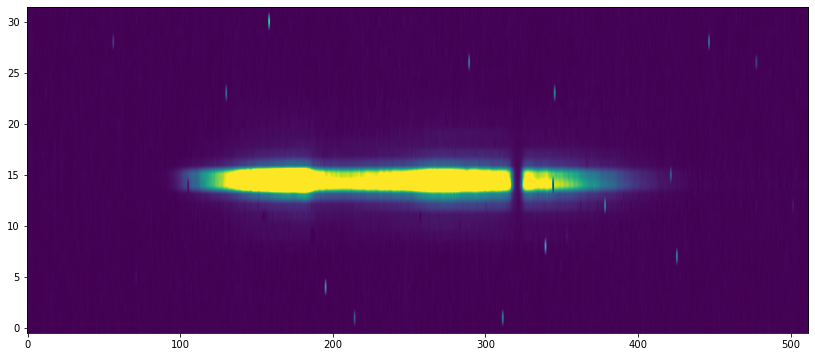

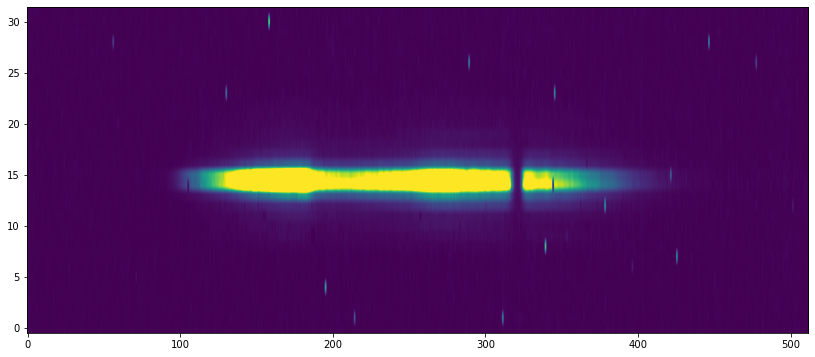

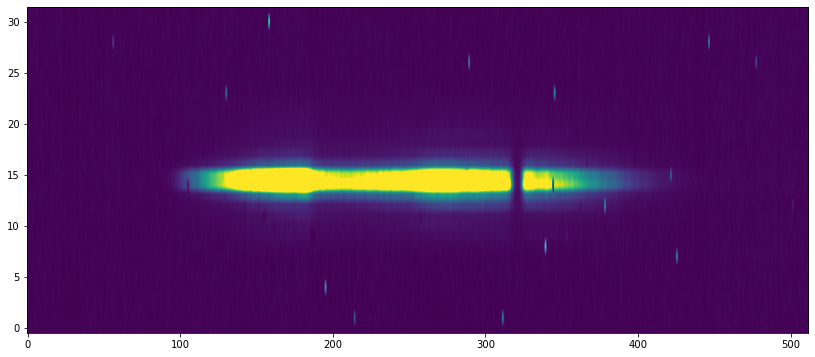

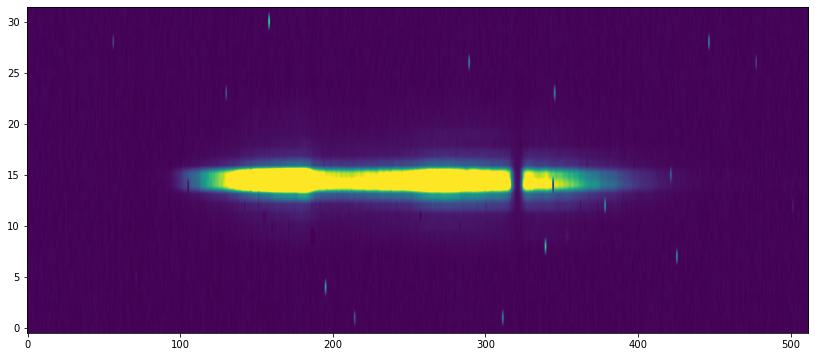

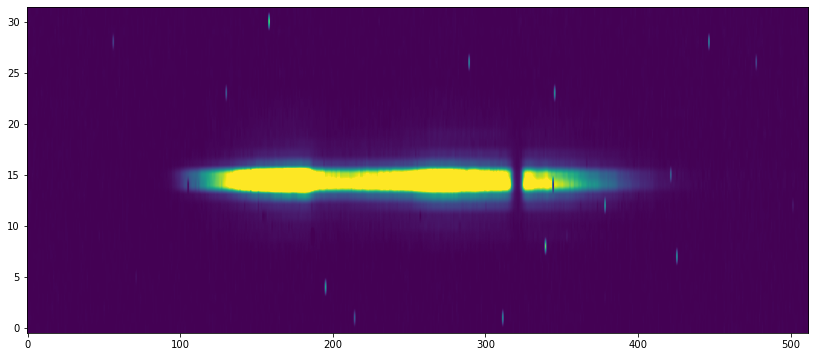

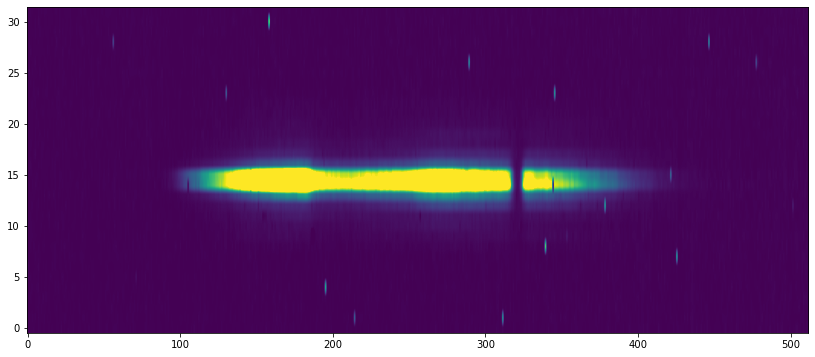

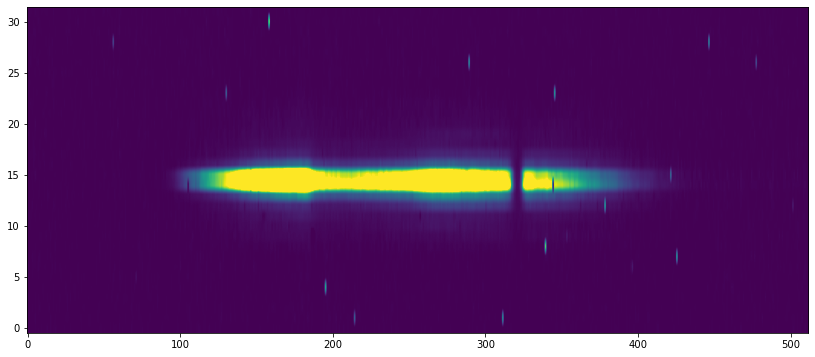

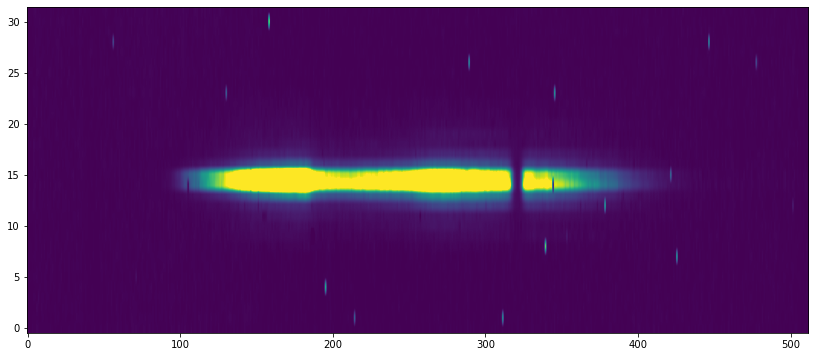

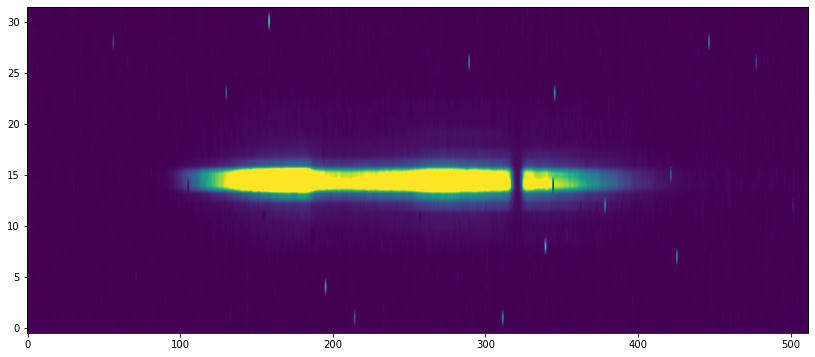

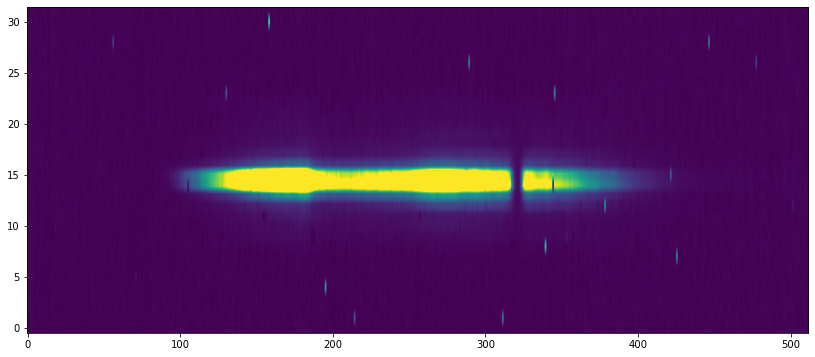

In [8]:
%matplotlib inline
for i in range(0, 10):
    print(i)
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    plt.imshow(hdul[1].data[i,1,:,:,], origin = 'lower', aspect='auto',  vmin=0, vmax=1e4)

In [9]:
# Sum the rows and columns for group 0

def row_col_counter(colsize, rowsize, group_num, integr_num):
    col_arrays = []
    col_sum = np.zeros(colsize)

    for col_num in range(0, rowsize):
        for row_num in range(0,colsize):
            col_sum[row_num] = hdul[1].data[integr_num,group_num,row_num,col_num]
        col_arrays.append(col_sum.tolist())

    col_arrays_flat = [item for sublist in col_arrays for item in sublist]
    
    return col_arrays, np.array(col_arrays_flat)


In [10]:
colsize = hdul[0].header['SUBSIZE2']
rowsize = hdul[0].header['SUBSIZE1']

col_arrays0, col_arrays_flat0 = row_col_counter(colsize, rowsize, group_num=0, integr_num=0)
col_arrays1, col_arrays_flat1 = row_col_counter(colsize, rowsize, group_num=0, integr_num=1)
col_arrays2, col_arrays_flat2 = row_col_counter(colsize, rowsize, group_num=0, integr_num=2)
col_arrays3, col_arrays_flat3 = row_col_counter(colsize, rowsize, group_num=0, integr_num=3)
col_arrays4, col_arrays_flat4 = row_col_counter(colsize, rowsize, group_num=0, integr_num=4)
col_arrays5, col_arrays_flat5 = row_col_counter(colsize, rowsize, group_num=0, integr_num=5)
col_arrays6, col_arrays_flat6 = row_col_counter(colsize, rowsize, group_num=0, integr_num=6)
col_arrays7, col_arrays_flat7 = row_col_counter(colsize, rowsize, group_num=0, integr_num=7)
col_arrays8, col_arrays_flat8 = row_col_counter(colsize, rowsize, group_num=0, integr_num=8)
col_arrays9, col_arrays_flat9 = row_col_counter(colsize, rowsize, group_num=0, integr_num=9)

In [11]:
np.shape(hdul[1].data[:,0,:,:])

(10, 32, 512)

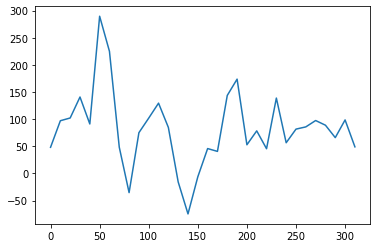

In [12]:
time_np = np.arange(0, 320, 10)
plt.plot(time_np, col_arrays0[0])

In [13]:
time_full = [time_np.copy()]
print(time_full)

for i in np.arange(1,rowsize):
    #print(i)
    #print(time_np.copy()+(120)+time_full[-1][-1])
    time_full.append(time_np.copy()+120+time_full[-1][-1])
    
    
time_full_flat = [item for sublist in time_full for item in sublist]
time_full_flat = np.array(time_full_flat)

[array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310])]


<IPython.core.display.Javascript object>


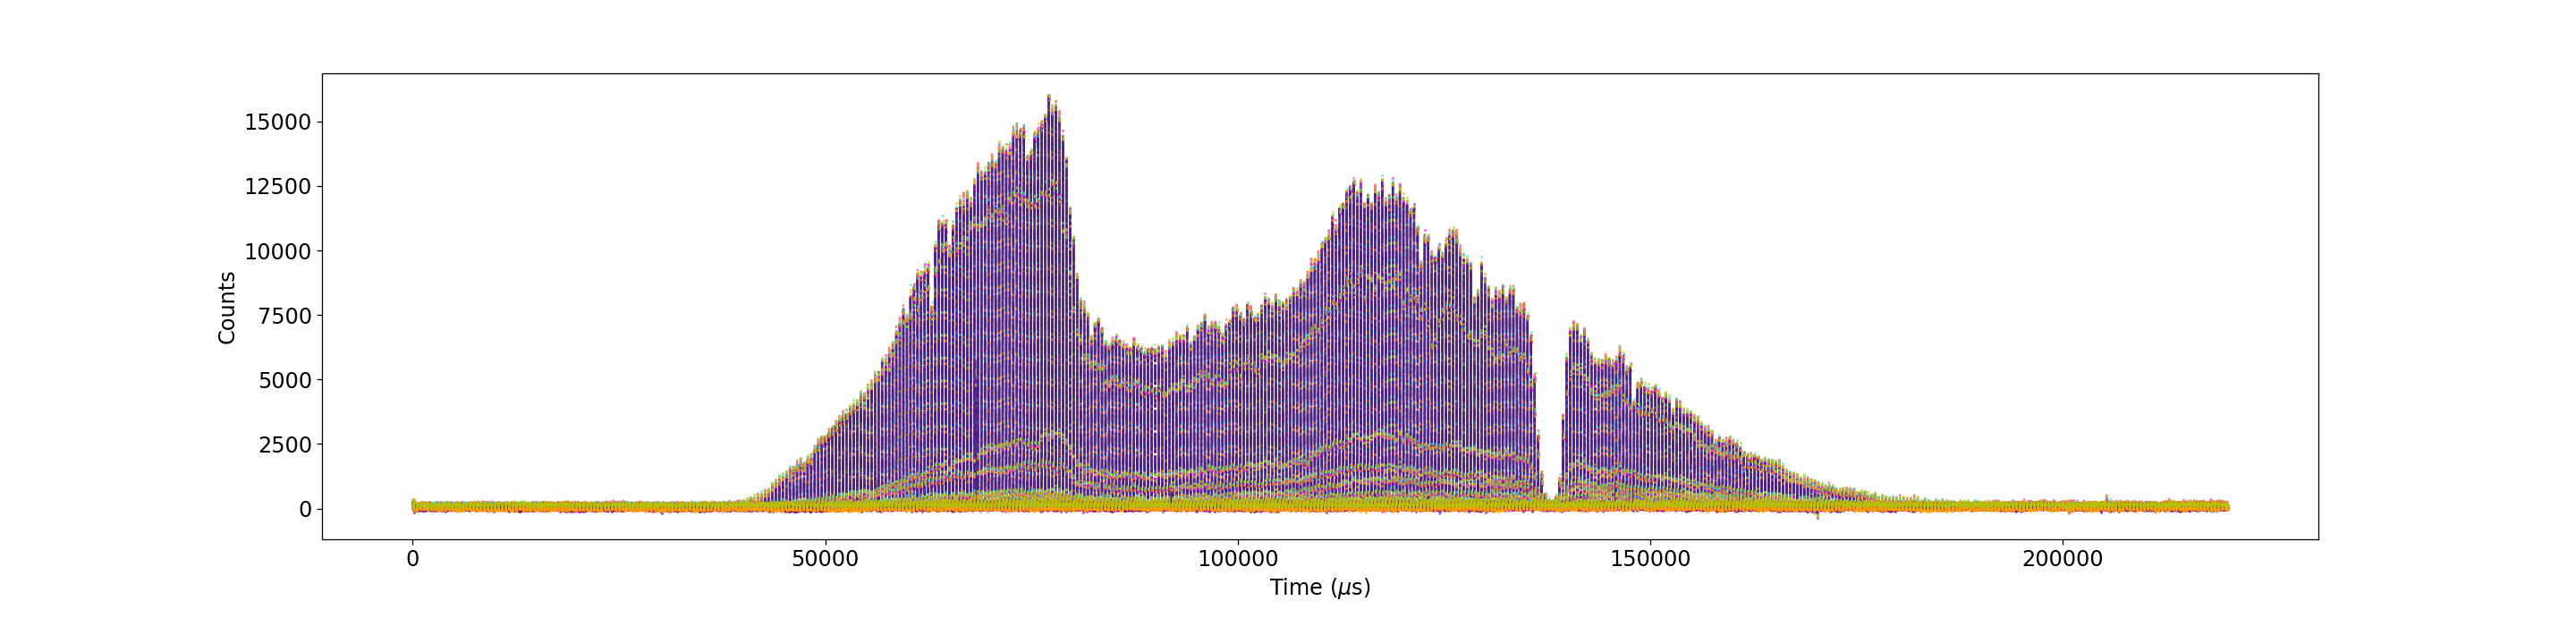

Text(0, 0.5, 'Counts')

In [14]:
# plot the ten different integrations
#%matplotlib inline
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(25, 6))

for i in np.arange(0, len(col_arrays0)):
    plt.plot(time_full[i], col_arrays0[i], "-.", color='k', alpha=0.5)
    plt.plot(time_full[i], col_arrays1[i], "-.", color='g', alpha=0.5)
    plt.plot(time_full[i], col_arrays2[i], "-.", color='r', alpha=0.5)
    plt.plot(time_full[i], col_arrays3[i], "-.", color='b', alpha=0.5)
    plt.plot(time_full[i], col_arrays4[i], ".", color='purple', alpha=0.5)
    plt.plot(time_full[i], col_arrays5[i], ".", color='lawngreen', alpha=0.5)
    plt.plot(time_full[i], col_arrays6[i], ".", color='fuchsia', alpha=0.5)
    plt.plot(time_full[i], col_arrays7[i], ".", color='turquoise', alpha=0.5)
    plt.plot(time_full[i], col_arrays8[i], ".", color='orange', alpha=0.5)
    plt.plot(time_full[i], col_arrays9[i], ".", color='y', alpha=0.5)
    #plt.xlim(0, 6000)
    #plt.ylim(-50, 400)
    
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Counts")

In [15]:
xmin = 40550
ymin = 180

xmax = 183500
ymax = 16000


def index_mask_finder(col_arrays_flat, ymin):
    indexes_keep = (np.array(col_arrays_flat0)<ymin).nonzero()[0]
    return indexes_keep

def masked_time_col(col_arrays_flat, ymin):
    indexes_keep = (np.array(col_arrays_flat)<ymin).nonzero()[0]
    return time_full_flat[index_mask_finder(col_arrays_flat, ymin)].tolist(), col_arrays_flat[index_mask_finder(col_arrays_flat, ymin)].tolist()


<IPython.core.display.Javascript object>


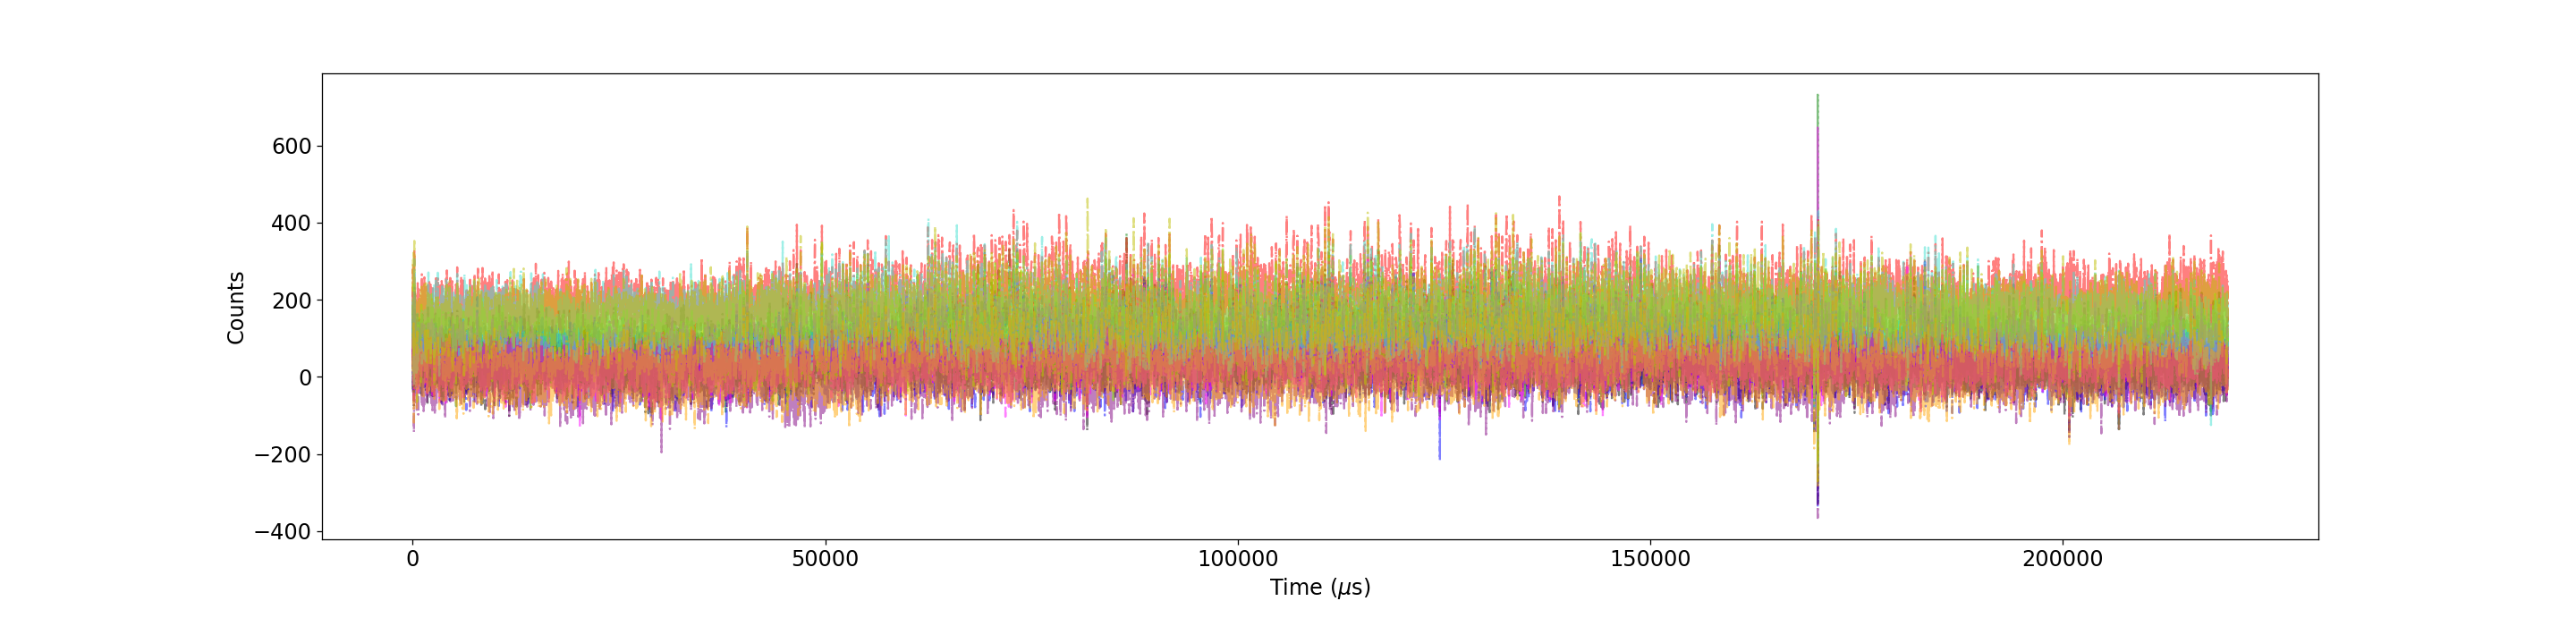

Text(0, 0.5, 'Counts')

In [16]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(25, 6))

plt.plot(time_full_flat[index_mask_finder(col_arrays_flat0, ymin)], 
         col_arrays_flat0[index_mask_finder(col_arrays_flat0, ymin)], "-.", color='k', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat1, ymin)], 
         col_arrays_flat1[index_mask_finder(col_arrays_flat1, ymin)], "-.", color='green', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat2, ymin)], 
         col_arrays_flat2[index_mask_finder(col_arrays_flat2, ymin)], "-.", color='r', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat3, ymin)], 
         col_arrays_flat3[index_mask_finder(col_arrays_flat3, ymin)], "-.", color='b', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat4, ymin)], 
         col_arrays_flat4[index_mask_finder(col_arrays_flat4, ymin)], "-.", color='purple', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat5, ymin)], 
         col_arrays_flat5[index_mask_finder(col_arrays_flat5, ymin)], "-.", color='lawngreen', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat6, ymin)], 
         col_arrays_flat6[index_mask_finder(col_arrays_flat6, ymin)], "-.", color='fuchsia', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat7, ymin)], 
         col_arrays_flat7[index_mask_finder(col_arrays_flat7, ymin)], "-.", color='turquoise', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat8, ymin)], 
         col_arrays_flat8[index_mask_finder(col_arrays_flat8, ymin)], "-.", color='orange', alpha=0.5)
plt.plot(time_full_flat[index_mask_finder(col_arrays_flat9, ymin)], 
         col_arrays_flat9[index_mask_finder(col_arrays_flat9, ymin)], "-.", color='y', alpha=0.5)
#plt.xlim(0, 6000)
#plt.ylim(-50, 400)
    
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Counts")

## extract masked times and column counts

In [27]:
masked_time0, maskedcol_arrays0 = masked_time_col(col_arrays_flat0, ymin)
masked_time1, maskedcol_arrays1 = masked_time_col(col_arrays_flat1, ymin)
masked_time2, maskedcol_arrays2 = masked_time_col(col_arrays_flat2, ymin)
masked_time3, maskedcol_arrays3 = masked_time_col(col_arrays_flat3, ymin)
masked_time4, maskedcol_arrays4 = masked_time_col(col_arrays_flat4, ymin)
masked_time5, maskedcol_arrays5 = masked_time_col(col_arrays_flat5, ymin)
masked_time6, maskedcol_arrays6 = masked_time_col(col_arrays_flat6, ymin)
masked_time7, maskedcol_arrays7 = masked_time_col(col_arrays_flat7, ymin)
masked_time8, maskedcol_arrays8 = masked_time_col(col_arrays_flat8, ymin)
masked_time9, maskedcol_arrays9 = masked_time_col(col_arrays_flat9, ymin)

all_masked_times = np.array([masked_time0, masked_time1, masked_time2, masked_time3, masked_time4, masked_time5,
                            masked_time6, masked_time7, masked_time8, masked_time9])
all_masked_cols = np.array([maskedcol_arrays0, maskedcol_arrays1, maskedcol_arrays2, maskedcol_arrays3, maskedcol_arrays4,
                            maskedcol_arrays5, maskedcol_arrays6, maskedcol_arrays7, maskedcol_arrays8, maskedcol_arrays9])
    

## Periodogram

In [29]:
%matplotlib inline
# import packages
from astropy.timeseries import LombScargle
from astropy.timeseries import TimeSeries
from astropy.table import Table
from astropy.time import Time
import astropy.units as u

min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 242560.18818745986
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 270401.8472213569
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 2200400.0
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 148277.7462362844
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 270401.8472213569
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 317253.85564045893
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 430.4397228413062
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 115562.3218264982
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 107.53359669201251
min freq: 4.544628249409198e-07 max freq: 0.16088029449191055
best period: 502656.15229295177


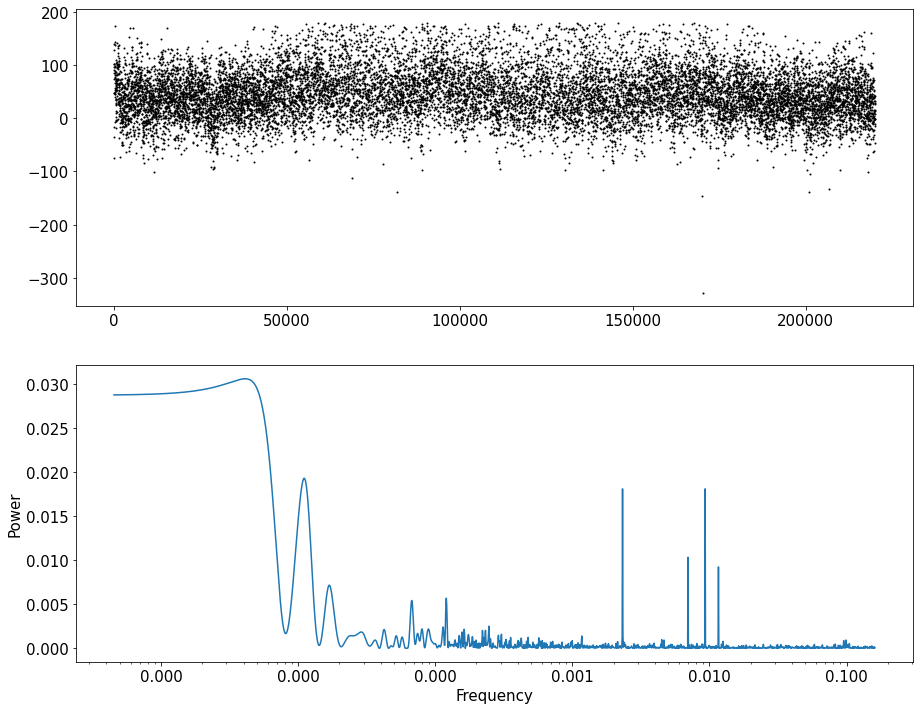

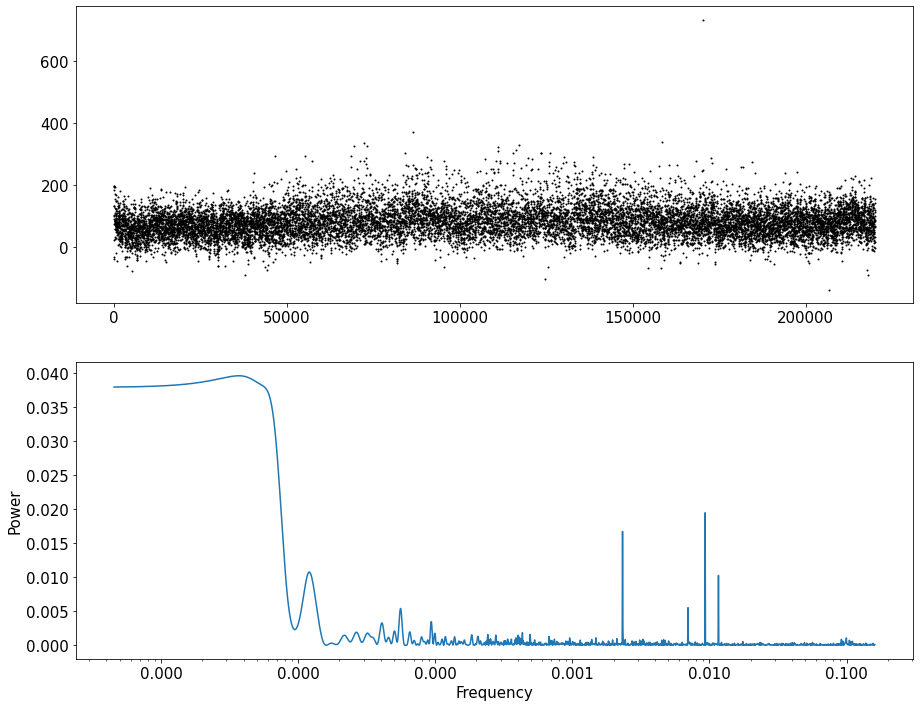

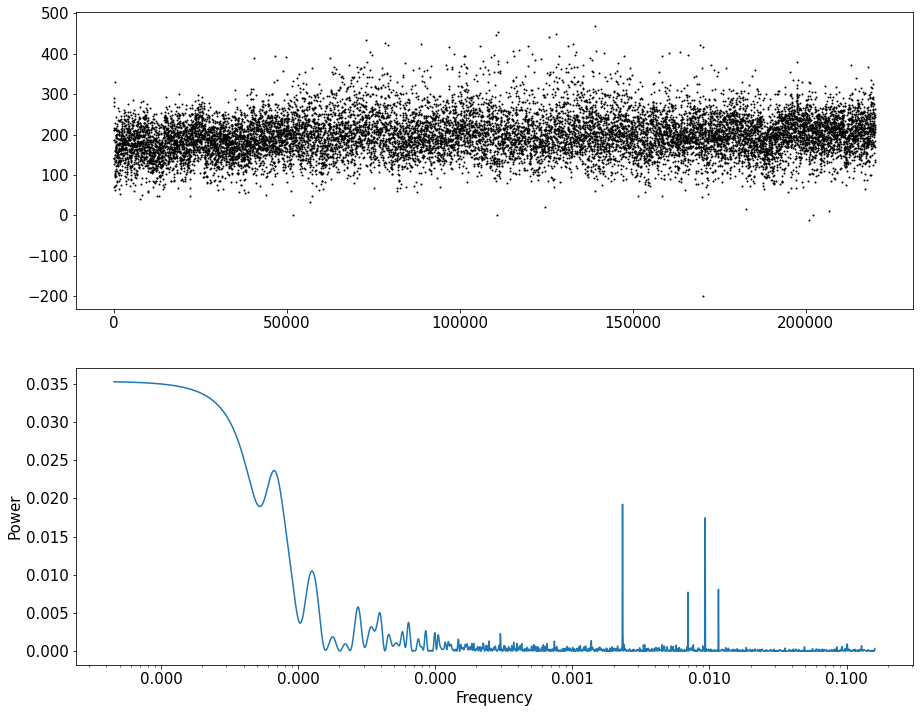

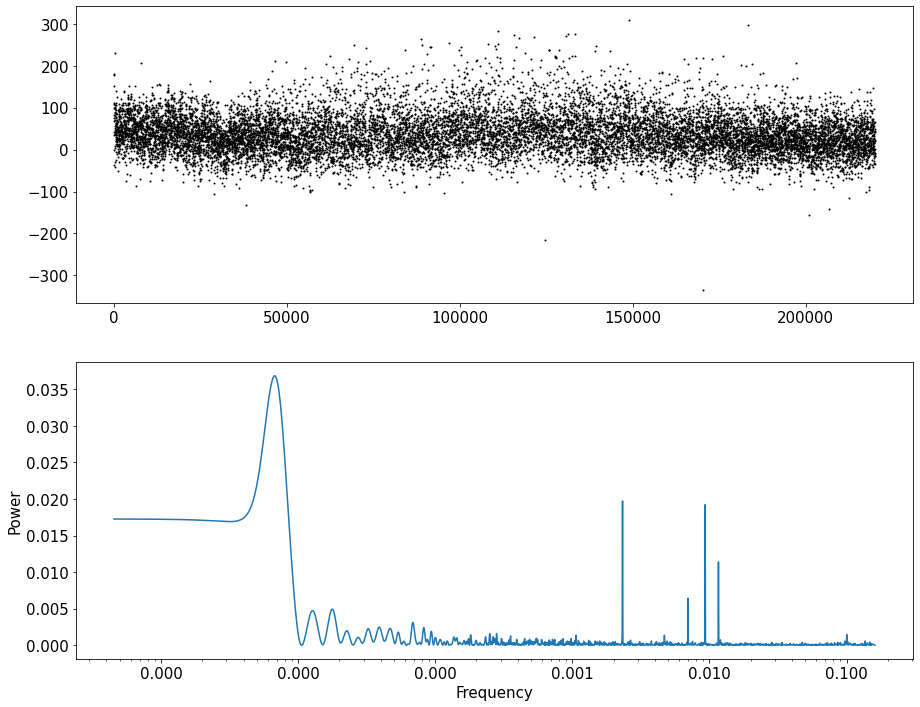

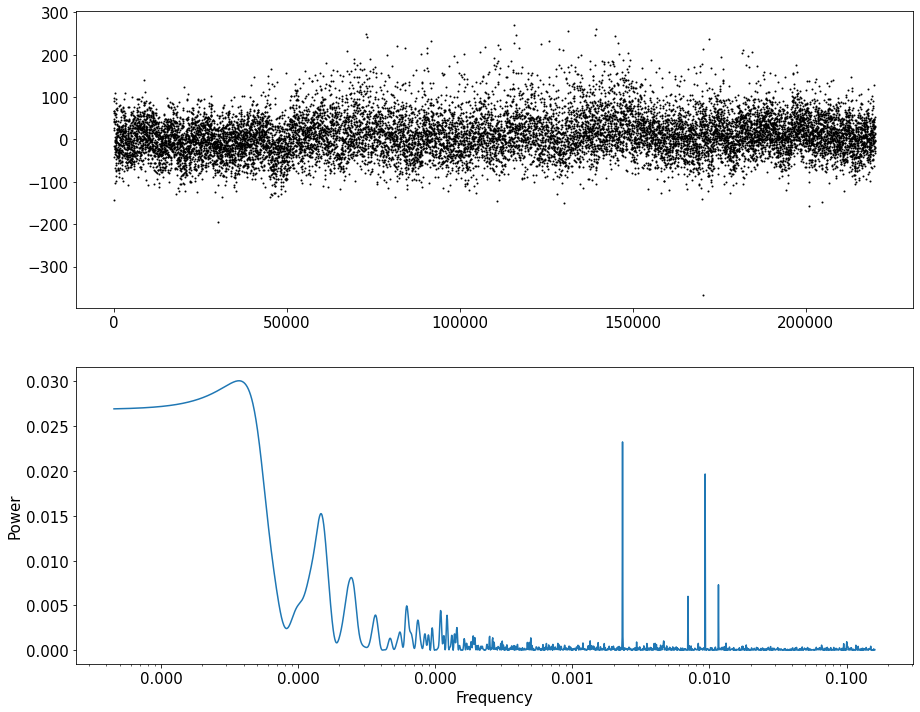

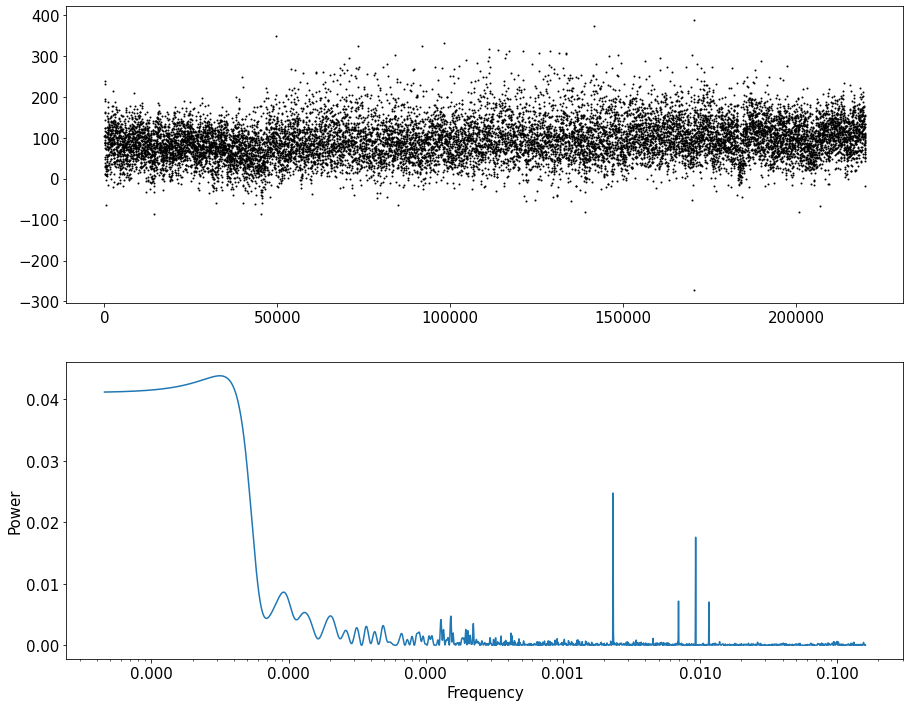

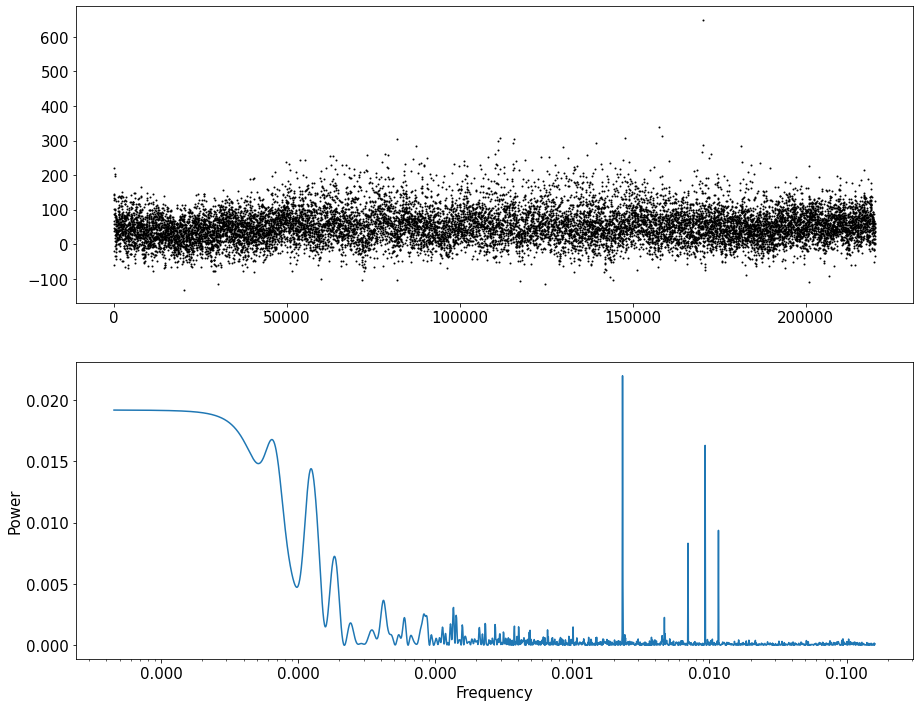

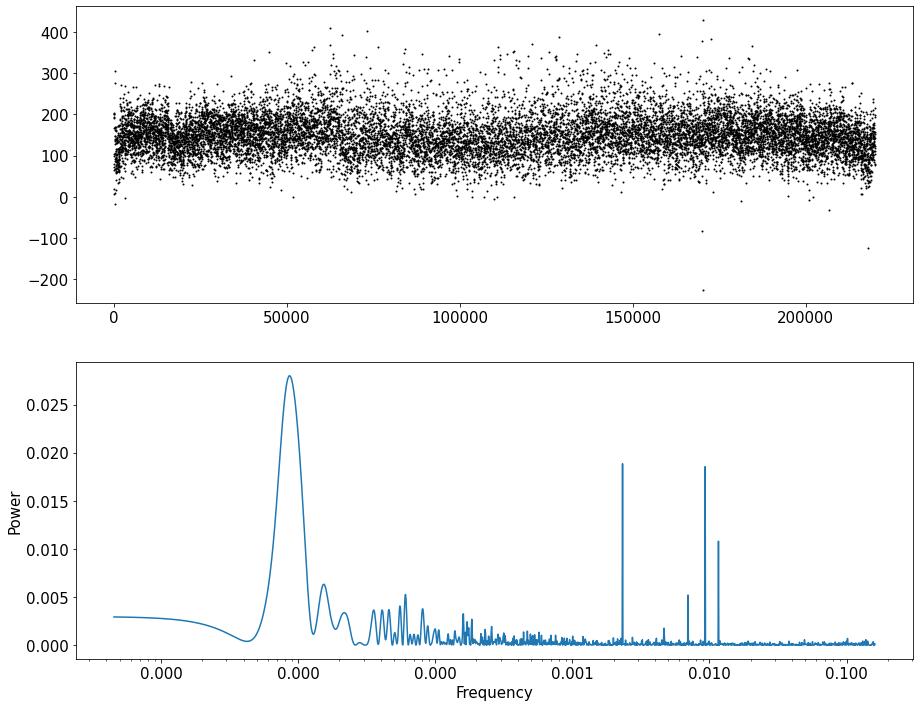

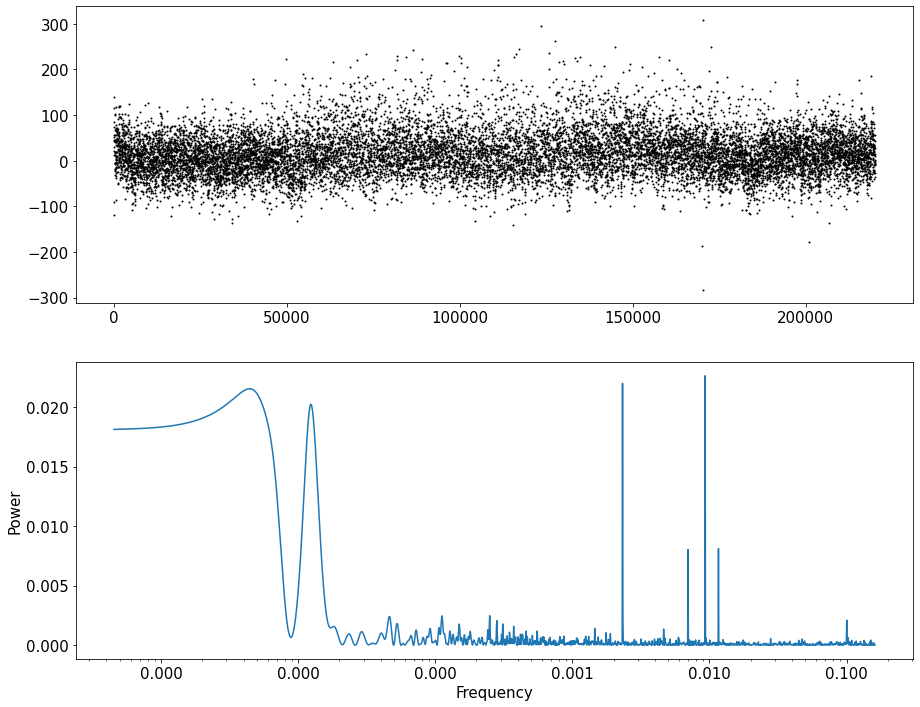

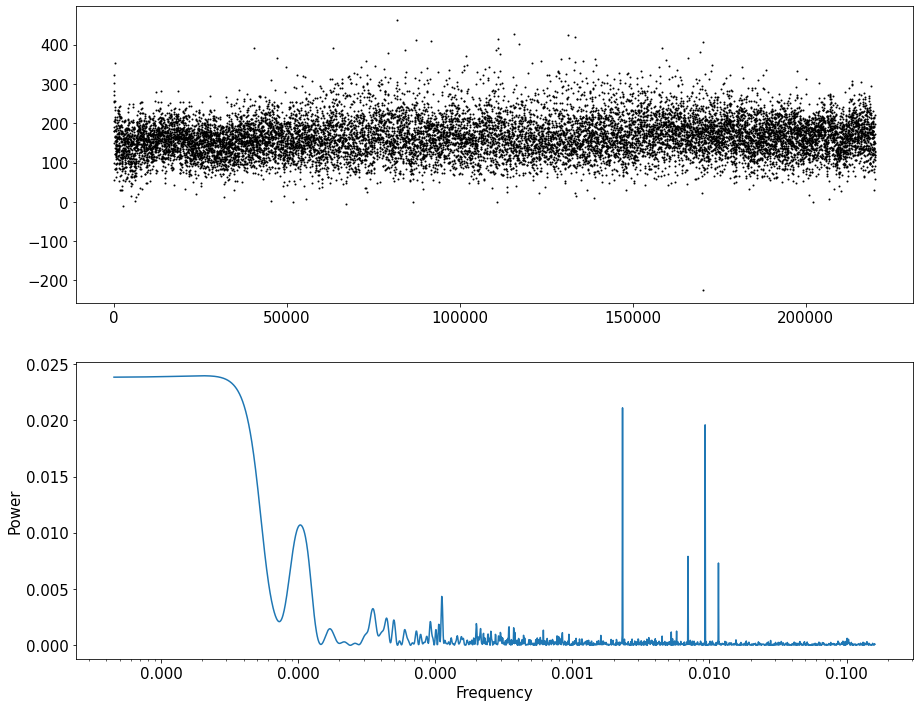

In [73]:
from matplotlib.ticker import ScalarFormatter

frequency_list = []
power_list = []

for num in range(0, len(all_masked_times)):
    x = all_masked_times[num]
    y = all_masked_cols[num]

    # plot with labels and synthetic planet of amplitude 0.78 m/s and 1 year period
    fig, axes = plt.subplots(2,1,figsize=(15, 12))
    ax = axes[0]
    ax.plot(x, y,".", color='k')

    frequency, power = LombScargle(x, y).autopower()
    min_freq = 4.544628249409198e-07 #np.min(frequency)
    max_freq = 0.16088029449191055 #np.max(frequency)
    print("min freq: "+str(min_freq)+" max freq: "+str(max_freq))

    frequency2 = np.geomspace(min_freq, max_freq, 2000)#len(frequency))
    power = LombScargle(x, y).power(frequency2)
    
    frequency_list.append(frequency2)
    power_list.append(power)

    ax = axes[1]
    ax.plot(frequency2, power)
    #plt.xlim(0,100)
    ax.set_xscale('log')
    ax.set_xscale('log')
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    #plt.ylim(-0.005, 0.03)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Power")

    best_frequency = frequency2[np.argmax(power)]
    print("best period: "+str(1/best_frequency))

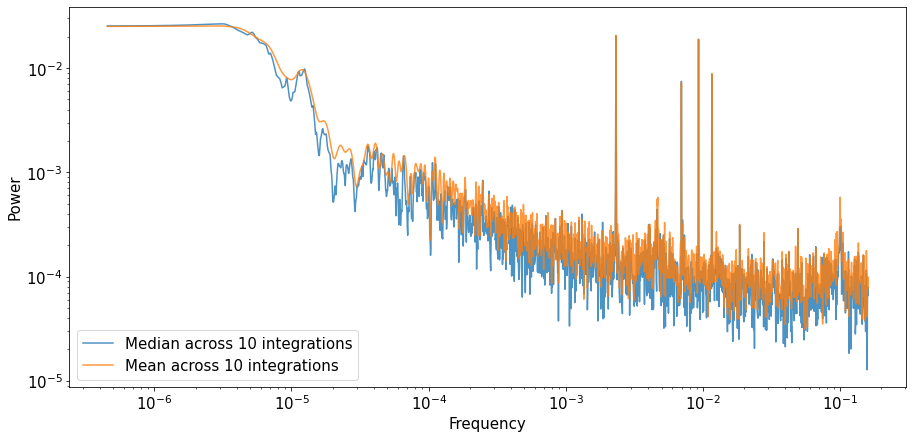

In [74]:
plt.rcParams['font.size'] = 15

med_freq = np.median(frequency_list, axis=0)
med_power = np.median(power_list, axis=0)

mean_freq = np.mean(frequency_list, axis=0)
mean_power = np.mean(power_list, axis=0)


fig, ax = plt.subplots(1,1,figsize=(15, 7))
ax.plot(med_freq, med_power, label="Median across 10 integrations", alpha=0.8)
ax.plot(mean_freq, mean_power, label="Mean across 10 integrations", alpha=0.8)
ax.set_xscale('log')
ax.set_yscale('log')
#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#plt.ylim(-0.005, 0.03)
ax.set_xlabel("Frequency")
ax.set_ylabel("Power")
ax.legend()

In [51]:
len(frequency)

177001

## Line subtraction

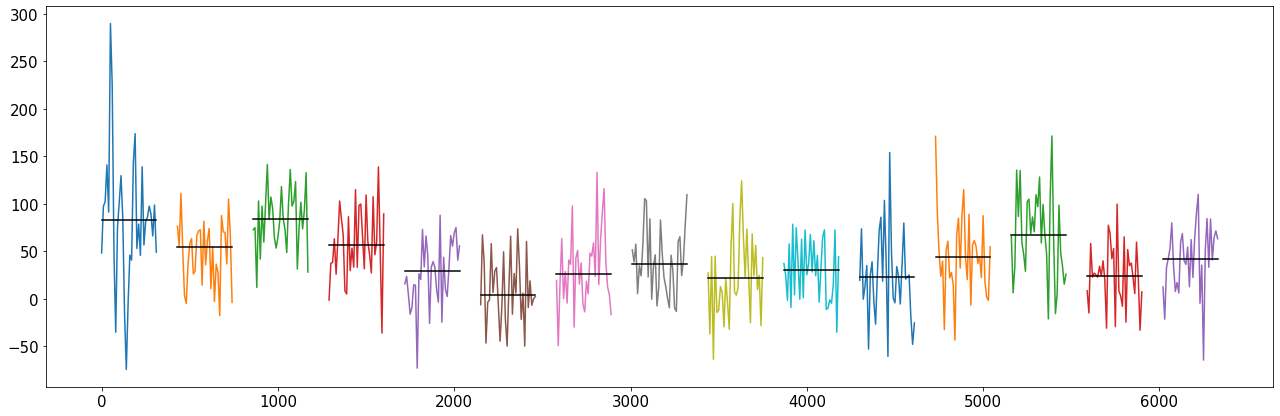

In [72]:
time_np = np.arange(0, 320, 10)

fig, ax = plt.subplots(1,1,figsize=(22, 7))
for number in range(0, 15):#len(col_arrays0)):
    median_col = np.median(col_arrays0[number])
    mean_col = np.mean(col_arrays0[number])
    plt.plot(time_full[number], col_arrays0[number])
    plt.plot(time_full[number], [median_col]*len(time_full[number]), color='k')
    
#fig, ax = plt.subplots(1,1,figsize=(22, 7))
#for number in range(15, 30):#len(col_arrays0)):
#    plt.plot(time_full[number], col_arrays0[number])

In [106]:
np.shape(np.transpose(time_full[number]).reshape((32, 1)))

(32, 1)

In [141]:
np.shape(np.transpose(time_full[number]))

def LS_fit(numbers, col_arrays):

    a_coeff_list = []
    x_list = []
    
    for number in numbers:
        # perform the L-S fit --------------
        n_cols = len(time_full[number])# + 1
        #n_rows = len(ccf_list_np)  # len(ccf_list_np)<---- unsmoothed
        x = np.zeros((32,2))

        x[:, 0] = 1
        x[:, 1] = time_full[number]


        #for i in np.arange(1, 32):
        #    x[:, i] = np.transpose(time_full[number]).reshape((32, 1))[i]  # (for all observations)
        y = col_arrays[number]

        alpha = x.transpose().dot(x)
        beta = x.transpose().dot(y)

        # and finally we can write a_coeff = alpha^-1 * beta
        inv_alpha = np.linalg.inv(alpha)
        a_coeff = inv_alpha.dot(beta)
        a_coeff_list.append(a_coeff.tolist())
        x_list.append(x.tolist())
        
    return a_coeff_list, x_list

In [142]:
#x.dot(a_coeff)
a_coeff

array([99.17027283, -0.10684362])

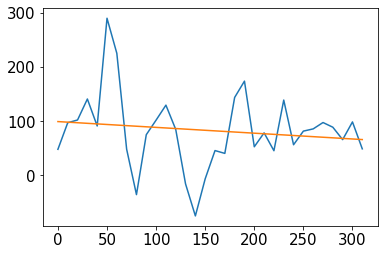

In [143]:
plt.plot(time_full[number], y)
plt.plot(time_full[number], x.dot(a_coeff))

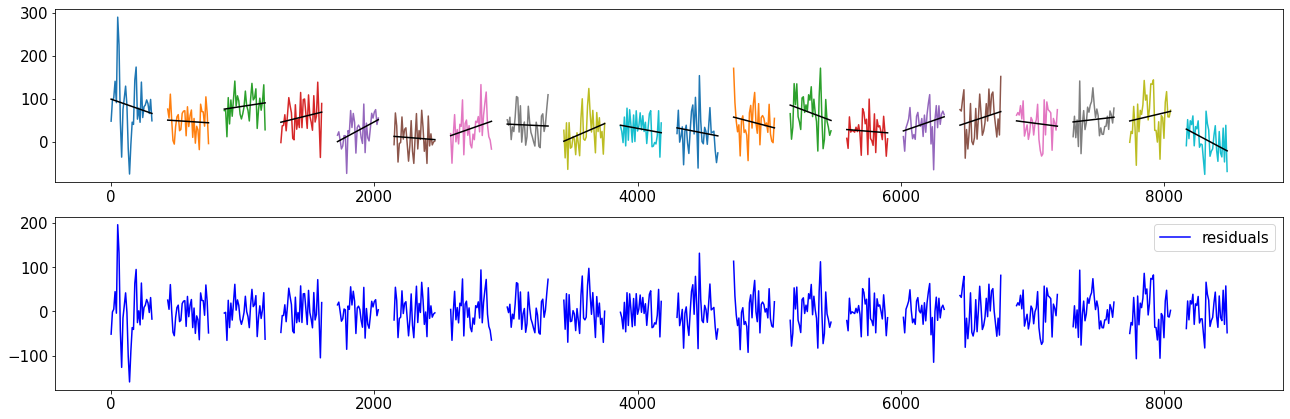

In [166]:
numbers_max = 20#512

a_coeff_list, x_list = LS_fit(np.arange(0, numbers_max), col_arrays0)

fig, axes = plt.subplots(2,1,figsize=(22, 7))


ax = axes[0]
for number in range(0, numbers_max):#len(col_arrays0)):
    ax.plot(time_full[number], col_arrays0[number])
    ax.plot(time_full[number], np.array(x_list[number]).dot(a_coeff_list[number]), color='k')

#ax.set_xlim(40000, 50000)
    
ax = axes[1]
number = 0
ax.plot(time_full[number], col_arrays0[number]-np.array(x_list[number]).dot(a_coeff_list[number]), 
            label="residuals", color='b')
for number in range(1, numbers_max):#len(col_arrays0)):
    ax.plot(time_full[number], col_arrays0[number]-np.array(x_list[number]).dot(a_coeff_list[number]), 
            color='b')

ax.legend()

In [158]:
len(col_arrays0)

512